In [103]:
import sys
#print(sys.path)
#sys.path.append('/Users/takumi/opt/anaconda3/envs/qc/lib/python3.9/site-packages')
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas
import tensorflow as tf
from keras.layers import *
#from keras.optimizers import *

#dir(tf.keras.layers)
#dir(tf.keras.optimizers)

In [104]:
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()
print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train :  (60000, 28, 28)
y_train :  (60000,)
X_test :  (10000, 28, 28)
y_test :  (10000,)


In [105]:
def y_initialize(y_data):
        y=[]
        for _ in range(len(y_data)):
            now=np.zeros(10)
            now[y_data[_]]=1.0
            y.append(now)

        return np.array(y)

In [106]:
y_train = y_initialize(y_train)
y_test = y_initialize(y_test)

y_train (i=1):  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
X_train (i=1): 


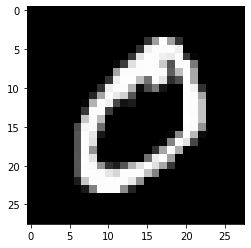

y_train (i=10):  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
X_train (i=10): 


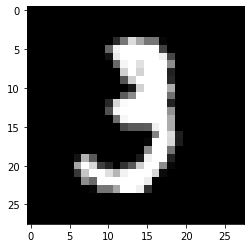

y_train (i=100):  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
X_train (i=100): 


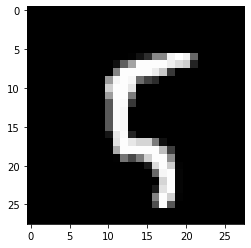

In [107]:
for i in [1,10,100]:
    print("y_train", "(i="+str(i)+"): ", y_train[i])
    print("X_train", "(i="+str(i)+"): ")    
    plt.imshow(X_train[i], cmap='gray')
    plt.show()

In [108]:
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256,input_dim=784))
model.add(Activation('relu'))
model.add(Dense(10,input_dim=256))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.0)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [99]:
#callbacks = []
#callbacks.append(tf.keras.callbacks.CSVLogger(CSV_FILE_PATH))

In [109]:

history = model.fit(X_train, y_train, 
                    batch_size=100, 
                    epochs=1000,
                    verbose=1, 
                    validation_data=(X_test, y_test))

Epoch 1/1000
600/600 [==============================] - 1s 2ms/step - loss: 2.1682 - accuracy: 0.3903 - val_loss: 0.2043 - val_accuracy: 0.5062
Epoch 2/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.1658 - accuracy: 0.6629 - val_loss: 0.1458 - val_accuracy: 0.7181
Epoch 3/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.1421 - accuracy: 0.7311 - val_loss: 0.1366 - val_accuracy: 0.7415
Epoch 4/1000
600/600 [==============================] - 1s 1ms/step - loss: 0.1387 - accuracy: 0.7507 - val_loss: 0.1338 - val_accuracy: 0.7789
Epoch 5/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.1278 - accuracy: 0.7738 - val_loss: 0.1422 - val_accuracy: 0.7445
Epoch 6/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.1303 - accuracy: 0.7816 - val_loss: 0.1370 - val_accuracy: 0.7870
Epoch 7/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.1261 - accuracy: 0.7882 - val_loss: 0.1157 - val_accuracy:

60000/60000 [==============================] - 50s 824us/step - loss: 0.0235 - accuracy: 0.9612
loss(train): 0.02346
accuracy(train): 0.9612

10000/10000 [==============================] - 8s 750us/step - loss: 0.1608 - accuracy: 0.9277
loss(test): 0.1608
accuracy(test): 0.9277


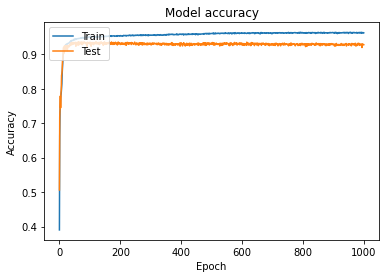

In [110]:
train_loss, train_acc = model.evaluate(X_train, y_train,batch_size=1, verbose=1)
print("loss(train): {:.4}".format(train_loss))
print("accuracy(train): {:.4}".format(train_acc))

print()

test_loss, test_acc = model.evaluate(X_test, y_test,batch_size=1,verbose=1)
print("loss(test): {:.4}".format(test_loss))
print("accuracy(test): {:.4}".format(test_acc))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
